In [13]:
import numpy as np,os
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
import h5py,numpy as np,os
path = '../data/fold0_noFIR.mat'
data = h5py.File(path, 'r')

x_train = data['trainX'][:].astype('float32')
x_train = np.expand_dims(x_train.transpose(),1)

x_val = data['valX'][:].astype('float32')
x_val = np.expand_dims(x_val.transpose(),1)

y_train = data['trainY'][:].astype('int32')
y_train = y_train.transpose()
y_train = y_train[:,0]
y_train[y_train<0] = 0

y_val = data['valY'][:].astype('int32')
y_val = y_val.transpose()
y_val = y_val[:,0]
y_val[y_val<0] = 0

val_parts = data['val_parts'][:].astype('int32').squeeze(0)
domain = np.array([x-97 for x in data['val_files'][:][0]])
train_domain = np.array([x-97 for x in data['train_files'][:][0]])

<ipython-input-37-14ff38c96ab8>:3: RuntimeWarning: invalid value encountered in true_divide
  a = np.where(np.abs(a)>2000, 2000*(a/abs(a)), a)


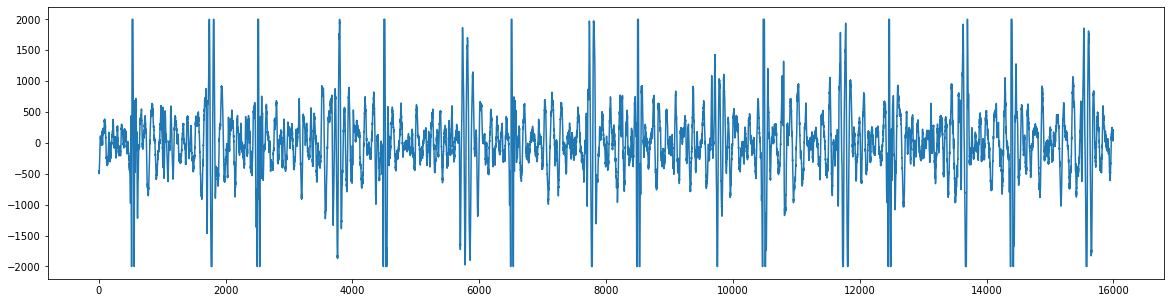

In [37]:
from scipy.io import wavfile
fs,a = wavfile.read("../data/wav files/a0001.wav")
a = np.where(np.abs(a)>2000, 2000*(a/abs(a)), a)
ts = 5000
win = 8
plt.figure(figsize=(20,5))
plt.plot(a[ts:ts+fs*win])